### THE SPARKS FOUNDATION - INTERNSHIP
### DOMAIN: DATA SCIENCE AND BUSINESS ANALYTICS
### AUTHOR: MUHAMMAD DANISH MUNIR
### PREDICTION USING LINEAR REGRESSION AND VARIOUS MACHINE LEARNING

### TASK: CONCRETE STRENGTH PREDICTION
This is a Heteroscedatic Dataset. Heteroscedasticity problem arises if variance of error term should not be constant. If we apply the Linear Regression method to heteroscedastic data then predicted values are inaccurate and our inference may be wrong about data. So here apply diffrent type of Machine learning models and compare with Linear Regression

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ConcreteStrengthData.csv")

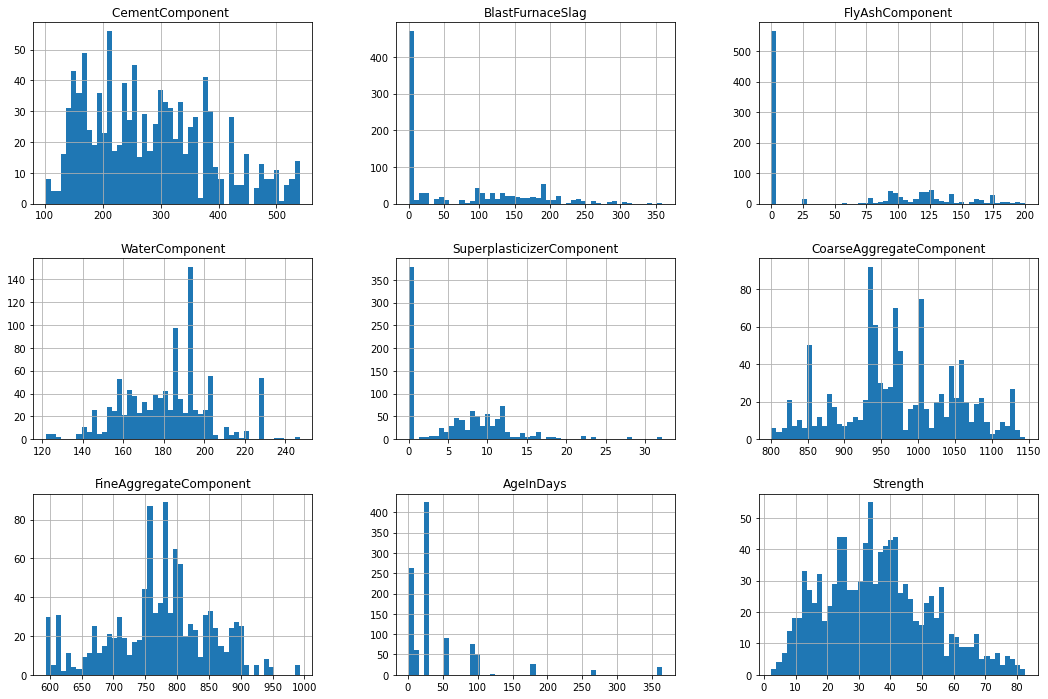

In [3]:
data.hist(bins=50,figsize=(18,12))
plt.show()

In [4]:
data.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [5]:
data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
x = data.iloc[:,0:8].values
y = (data.loc[:,"Strength"].values)


In [7]:
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20, random_state=42)

## LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [11]:
lpred = lr.predict(xtest)

In [12]:
from sklearn.metrics import mean_squared_error
lm = mean_squared_error(ytest,lpred)
lm

95.97094009110677

In [13]:
from sklearn.metrics import r2_score
rsq = r2_score(ytest,lpred)
rsq

0.6275531792314851

In [14]:
from sklearn.metrics import max_error
max_error(ytest,lpred)

27.78281956689682

In [15]:
Lresults = pd.DataFrame(lpred,ytest).reset_index()
Lresults.columns = ["orignal","Regression"]

In [16]:
Lresults

,orignal,Regression
0,52.91,59.658042
1,55.90,52.041211
2,74.50,63.535133
3,35.30,51.575457
4,10.54,17.220017
...,...,...
201,56.14,55.987586
202,18.75,17.479621
203,38.00,49.086522
204,74.36,54.181552


## DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [18]:
Dfit = DTR.fit(xtrain,ytrain)

In [19]:
Dpred = DTR.predict(xtest)

In [20]:
from sklearn.metrics import mean_squared_error
Dm = mean_squared_error(ytest,Dpred)
Dm

43.77956699029125

In [21]:
from sklearn.metrics import r2_score
Drsq = r2_score(ytest,Dpred)
Drsq

0.8300989807469108

In [22]:
from sklearn.metrics import max_error
max_error(ytest,Dpred)

23.04999999999999

In [23]:
Dresults = pd.DataFrame(Dpred,ytest).reset_index()
Dresults.columns = ["orignal","Decission Tree"]
Dresults

,orignal,Decission Tree
0,52.91,51.73
1,55.90,39.40
2,74.50,71.30
3,35.30,35.30
4,10.54,10.54
...,...,...
201,56.14,55.25
202,18.75,18.42
203,38.00,42.80
204,74.36,65.70


## RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [25]:
RF.fit(xtrain,ytrain)

RandomForestRegressor()

In [26]:
Rpred = RF.predict(xtest)

In [27]:
from sklearn.metrics import mean_squared_error
Rm = mean_squared_error(ytest,Rpred)
Rm

29.91813786687672

In [28]:
from sklearn.metrics import r2_score
Rrsq = r2_score(ytest,Rpred)
Rrsq

0.8838928187922906

In [29]:
from sklearn.metrics import max_error
max_error(ytest,Rpred)

18.68009999999996

In [30]:
Rresults = pd.DataFrame(Rpred,ytest).reset_index()
Rresults.columns = ["orignal","RandomForest"]
Rresults

,orignal,RandomForest
0,52.91,51.731700
1,55.90,41.296550
2,74.50,70.719800
3,35.30,34.730715
4,10.54,11.537300
...,...,...
201,56.14,55.175182
202,18.75,24.785700
203,38.00,32.306300
204,74.36,68.770700


## GradientBoostingRegressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

In [32]:
GB.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [33]:
Gpred = GB.predict(xtest)

In [34]:
from sklearn.metrics import mean_squared_error
Gm = mean_squared_error(ytest,Gpred)
Gm

30.17689818858975

In [35]:
from sklearn.metrics import r2_score
Grsq = r2_score(ytest,Gpred)
Grsq

0.8828886141958622

In [36]:
from sklearn.metrics import max_error
max_error(ytest,Gpred)

22.12918971372978

In [37]:
Gresults = pd.DataFrame(Gpred,ytest).reset_index()
Gresults.columns = ["orignal","Gradient Boost"]
Gresults

,orignal,Gradient Boost
0,52.91,48.977092
1,55.90,45.763215
2,74.50,69.299746
3,35.30,34.171659
4,10.54,12.774094
...,...,...
201,56.14,58.577814
202,18.75,24.936507
203,38.00,46.379978
204,74.36,63.804978


## KNeighborsRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [39]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [40]:
Kpred = KNN.predict(xtest)

In [41]:
from sklearn.metrics import mean_squared_error
Km = mean_squared_error(ytest,Kpred)
Km

67.80238333980583

In [42]:
from sklearn.metrics import r2_score
Krsq = r2_score(ytest,Gpred)
Krsq

0.8828886141958622

In [43]:
from sklearn.metrics import max_error
max_error(ytest,Gpred)

22.12918971372978

In [44]:
Kresults = pd.DataFrame(Kpred,ytest).reset_index()
Kresults.columns = ["orignal","KNN"]
Kresults

,orignal,KNN
0,52.91,52.064
1,55.90,44.140
2,74.50,64.338
3,35.30,39.120
4,10.54,12.214
...,...,...
201,56.14,52.498
202,18.75,20.864
203,38.00,56.564
204,74.36,54.192


In [45]:
print("Regression","\n","Mean Square error : ",lm,"\n","r-sq score : ", rsq,"\n","\n"
     "Decisiontree","\n","Mean Square error : ",Dm,"\n","r-sq score : ", Drsq,"\n","\n"
     "Random Forest","\n","Mean Square error : ",Rm,"\n","r-sq score : ", Rrsq,"\n","\n"
     "Gradient Boost","\n","Mean Square error : ",Gm,"\n","r-sq score : ", Grsq,"\n","\n"
     "K Nearest Neighbors","\n","Mean Square error : ",Km,"\n","r-sq score : ",Krsq, "\n","\n")

Regression 
 Mean Square error :  95.97094009110677 
 r-sq score :  0.6275531792314851 
 
Decisiontree 
 Mean Square error :  43.77956699029125 
 r-sq score :  0.8300989807469108 
 
Random Forest 
 Mean Square error :  29.91813786687672 
 r-sq score :  0.8838928187922906 
 
Gradient Boost 
 Mean Square error :  30.17689818858975 
 r-sq score :  0.8828886141958622 
 
K Nearest Neighbors 
 Mean Square error :  67.80238333980583 
 r-sq score :  0.8828886141958622 
 



In [46]:
df = pd.DataFrame([ytest,lpred,Dpred,Rpred,Gpred,Kpred] ).T
df.columns = ["y test","Regression","Decision Tree","Random Forest","Gradient Boost","K Nearest Neighbors"]
df

,y test,Regression,Decision Tree,Random Forest,Gradient Boost,K Nearest Neighbors
0,52.91,59.658042,51.73,51.731700,48.977092,52.064
1,55.90,52.041211,39.40,41.296550,45.763215,44.140
2,74.50,63.535133,71.30,70.719800,69.299746,64.338
3,35.30,51.575457,35.30,34.730715,34.171659,39.120
4,10.54,17.220017,10.54,11.537300,12.774094,12.214
...,...,...,...,...,...,...
201,56.14,55.987586,55.25,55.175182,58.577814,52.498
202,18.75,17.479621,18.42,24.785700,24.936507,20.864
203,38.00,49.086522,42.80,32.306300,46.379978,56.564
204,74.36,54.181552,65.70,68.770700,63.804978,54.192


In [47]:
df.to_csv("output.csv")

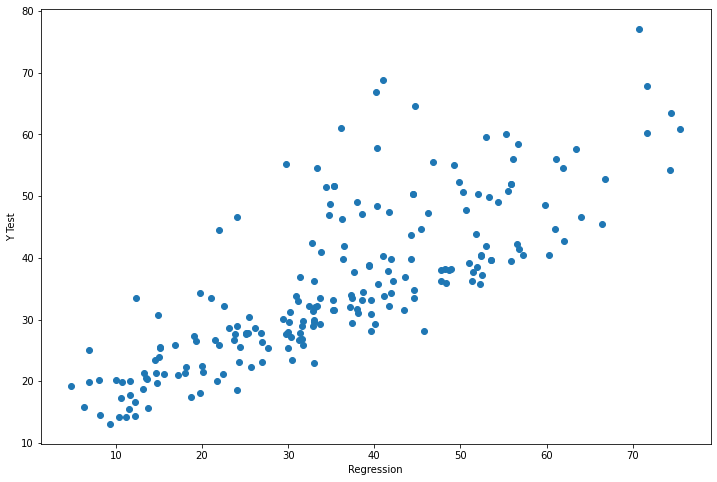

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(ytest,lpred)
plt.xlabel("Regression")
plt.ylabel("Y Test")
plt.show()

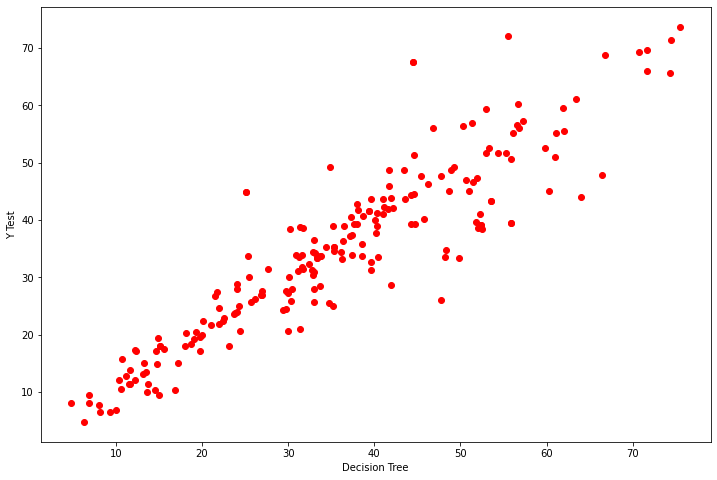

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(ytest,Dpred, color='red')
plt.xlabel("Decision Tree")
plt.ylabel("Y Test")
plt.show()


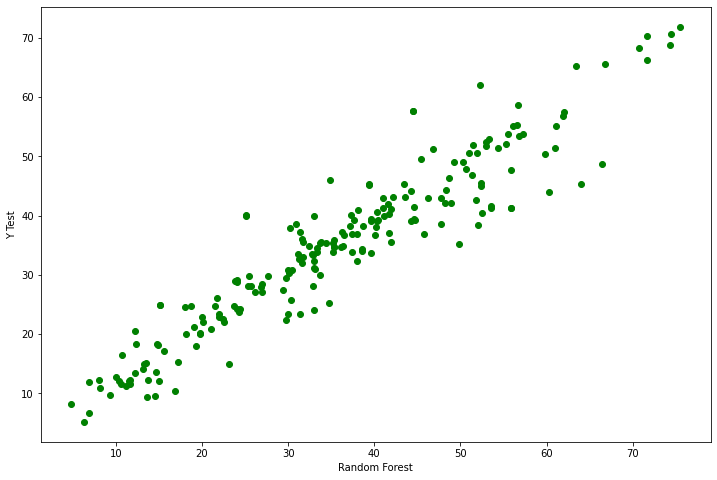

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(ytest,Rpred, color='green')
plt.xlabel("Random Forest")
plt.ylabel("Y Test")
plt.show()


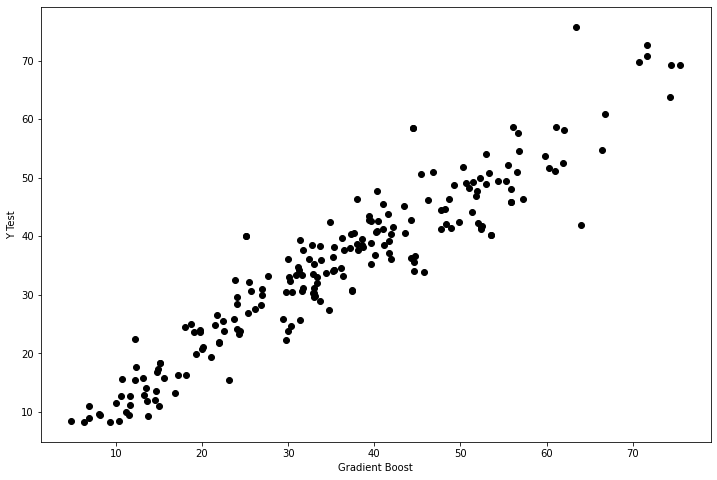

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(ytest,Gpred,  color='black')
plt.xlabel("Gradient Boost")
plt.ylabel("Y Test")
plt.show()


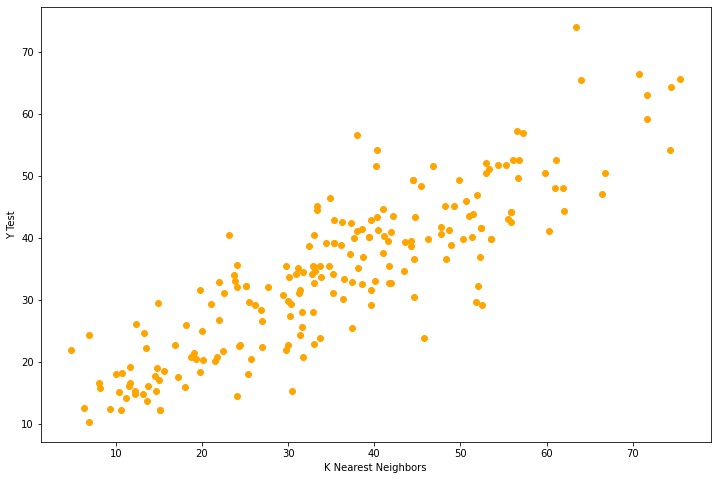

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(ytest,Kpred, color='orange')
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Y Test")
plt.show()